## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width', 10000)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Dataset

In [2]:
df = pd.read_csv("German Credit Dataset.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
# we can conclude from above there is no null values

In [6]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
df.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                   6
amount                  921
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      53
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
default                   2
dtype: int64

In [8]:
for col in df.columns:
    print('='*75)
    print(" "*15,col)
    print('='*75)
    print(df[col].unique())

                checking_balance
['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
                months_loan_duration
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
                credit_history
['critical' 'good' 'poor' 'perfect' 'very good']
                purpose
['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
                amount
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  26

In [9]:
# purpose col has a car0 value that we have to replace it with car 

In [10]:
df["purpose"] =df["purpose"].replace("car0", "car")

In [11]:
# no missing value treatment and outlier detection required

In [12]:
df.duplicated().sum()

0

## Encoding

In [13]:
df["checking_balance"] = df["checking_balance"].astype("O")
df["savings_balance"] = df["savings_balance"].astype("O")
df["savings_balance"] = df["savings_balance"].astype("O")

In [14]:
from sklearn.preprocessing import LabelEncoder
col=[]
for i in df.columns:
    if df[i].dtype == 'O' or df[i].dtype == 'bool':
        if df[i].nunique() <3: # for bool
            label = LabelEncoder()
            df[i] = label.fit_transform(df[i])
        if df[i].nunique() > 2: # for multiple value
            col.append(i)
df = pd.get_dummies(df, columns= col)

In [15]:
# To avoid multicolinearity bcz of one hot encoding dropping  col
df.drop("checking_balance_1 - 200 DM",axis = 1,inplace = True)
df.drop("credit_history_critical",axis = 1,inplace = True)
df.drop("purpose_business",axis = 1,inplace = True)
df.drop("savings_balance_100 - 500 DM",axis = 1,inplace = True)
df.drop("employment_duration_1 - 4 years",axis = 1,inplace = True)
df.drop("other_credit_bank",axis = 1,inplace = True)
df.drop("housing_other",axis = 1,inplace = True)
df.drop("job_management",axis = 1,inplace = True)

In [16]:
x = df.drop("default",axis =1)
y = df[["default"]]

## Feature Scaling

In [17]:
# standardization : -3 to 3

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.214598,1.627770,-0.259299,-0.806328,-1.061913,-0.204124,-0.31063,-0.226991,-0.732187,-0.250398,1.055540,-0.149983,-0.259299,-1.232433,-0.224544,2.112932,-0.45897,-0.455773,1.718304,-0.257095,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.823318,-0.614337,-0.259299,-0.806328,0.941697,-0.204124,-0.31063,-0.226991,-0.732187,-0.250398,1.055540,-0.149983,-0.259299,0.811403,-0.224544,-0.473276,-0.45897,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.823318,-0.614337,-0.259299,1.240190,-1.061913,-0.204124,-0.31063,-0.226991,-0.732187,3.993639,-0.947382,-0.149983,-0.259299,0.811403,-0.224544,-0.473276,2.17879,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.823318,1.627770,-0.259299,-0.806328,0.941697,-0.204124,-0.31063,-0.226991,-0.732187,-0.250398,1.055540,-0.149983,-0.259299,0.811403,-0.224544,-0.473276,2.17879,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.823318,1.627770,-0.259299,-0.806328,-1.061913,-0.204124,3.21926,-0.226991,1.365771,-0.250398,-0.947382,-0.149983,-0.259299,0.811403,-0.224544,-0.473276,-0.45897,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5
5,1.252574,2.050009,-0.870183,1.046987,-0.048022,-0.704926,2.334869,1.214598,-0.614337,-0.259299,1.240190,0.941697,-0.204124,-0.31063,-0.226991,-0.732187,3.993639,-0.947382,-0.149983,-0.259299,-1.232433,-0.224544,2.112932,-0.45897,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,-1.576173,-0.466933,-1.304877,-0.149983,2.0
6,0.256953,-0.154629,0.024147,1.046987,1.535122,-0.704926,-0.428290,-0.823318,-0.614337,-0.259299,1.240190,0.941697,-0.204124,-0.31063,-0.226991,-0.732187,-0.250398,1.055540,-0.149983,3.856555,-1.232433,-0.224544,-0.473276,-0.45897,-0.455773,1.718304,-0.257095,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5
7,1.252574,1.303197,-0.870183,-0.765977,-0.048022,-0.704926,-0.428290,1.214598,-0.614337,-0.259299,-0.806328,0.941697,-0.204124,-0.31063,-0.226991,1.365771,-0.250398,-0.947382,-0.149983,-0.259299,0.811403,-0.224544,-0.473276,-0.45897,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,-1.576173,2.141633,-1.304877,-0.149983,-0.5
8,-0.738668,-0.075233,-0.870183,1.046987,2.238742,-0.704926,-0.428290,-0.823318,-0.614337,-0.259299,1.240190,0.941697,-0.204124,-0.31063,-0.226991,-0.732187,-0.250398,1.055540,-0.149983,-0.259299,-1.232433,4.453463,-0.473276,2.17879,-0.455773,-0.581969,-0.257095,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0
9,0.754763,0.695681,0.918477,-0.765977,-0.663689,1.027079,-0.428290,-0.823318,-0.614337,-0.259299,-0.806328,-1.061913,-0.204124,-0.31063,-0.226991,1.365771,-0.250398,-0.947382,-0.149983,-0.259299,0.811403,-0.224544,-0.473276,-0.45897,-0.455773,-0.581969,3.889606,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,-0.5


## Checking Balance and Imbalance

In [18]:
df["default"].value_counts()

0    700
1    300
Name: default, dtype: int64

In [20]:
import imblearn
from imblearn.over_sampling import RandomOverSampler # SMOTE
ros = RandomOverSampler() # SMOTE()
x_sam, y_sam = ros.fit_resample(x, y)
print(x_sam.shape, y_sam.shape, y.shape)

(1400, 34) (1400, 1) (1000, 1)


In [21]:
y_sam.value_counts()

default
0          700
1          700
dtype: int64

## correlationn check

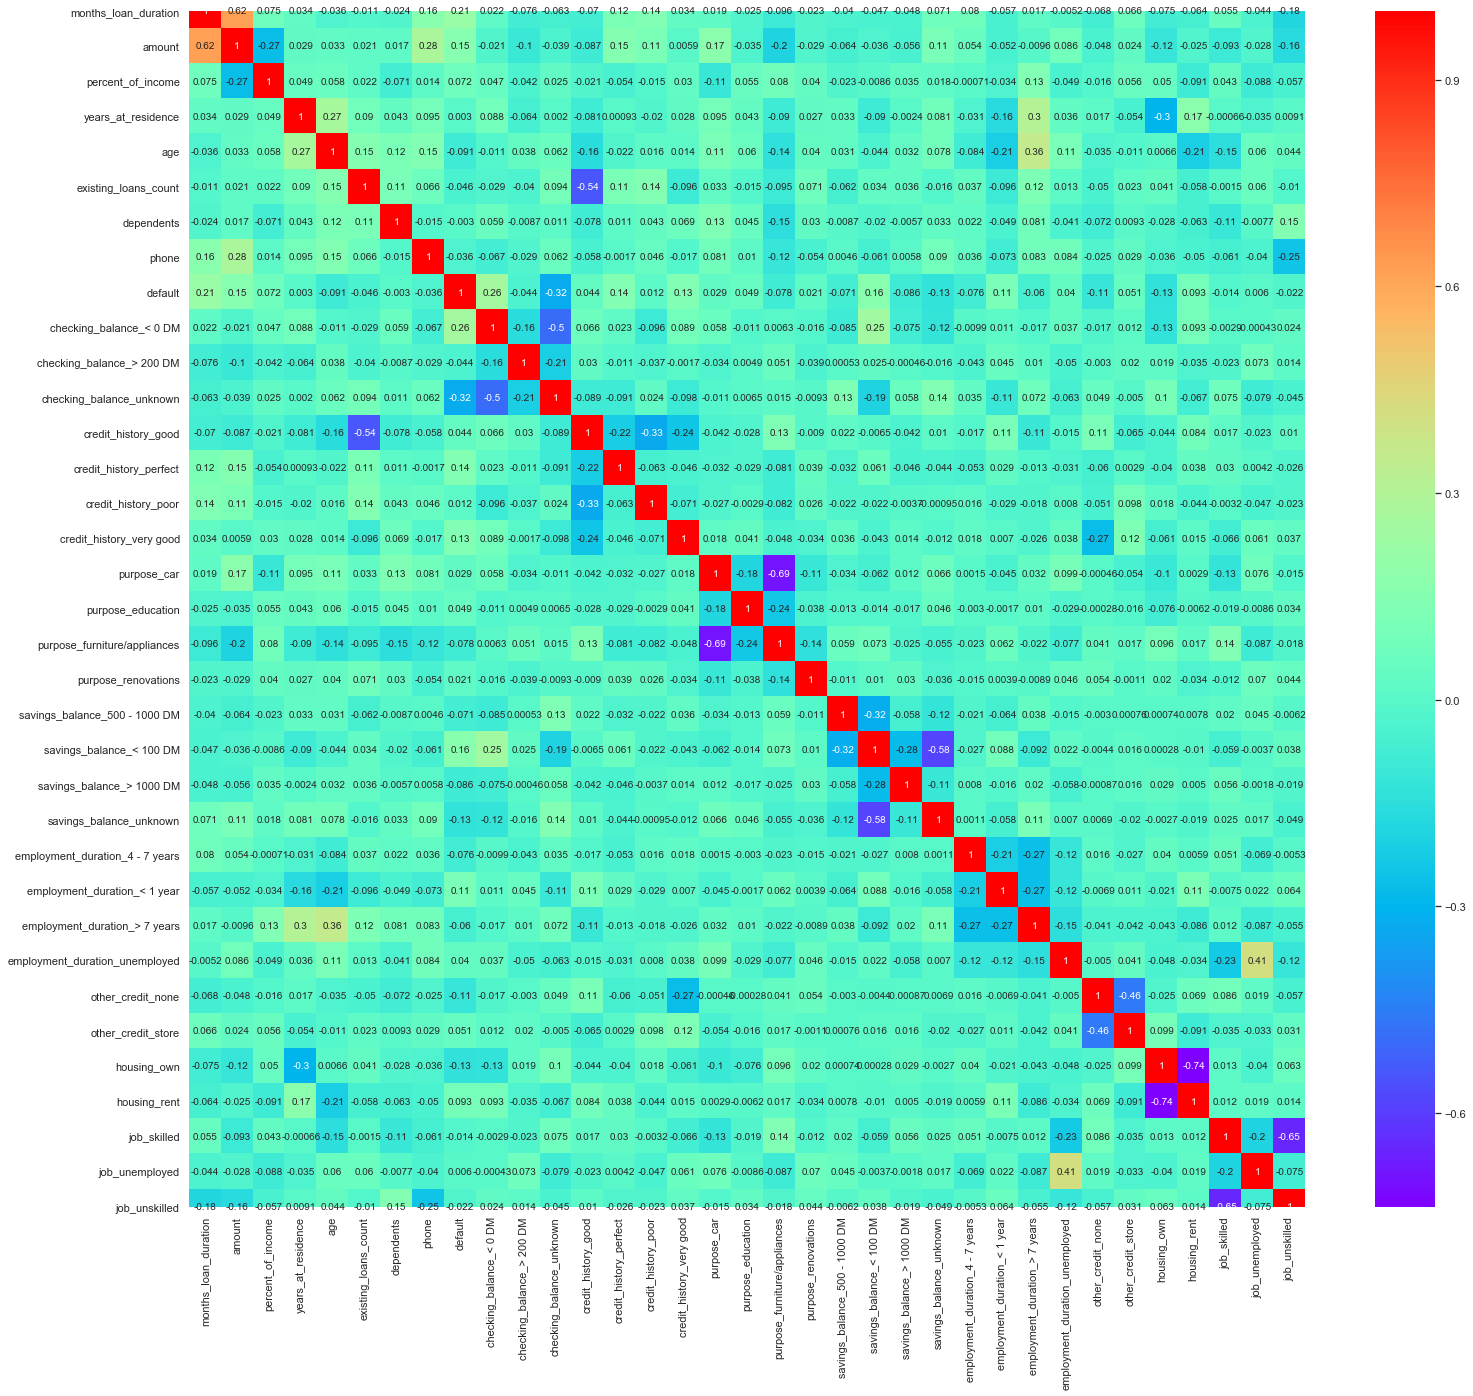

In [40]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

## Multi colinearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,2.002272,months_loan_duration
1,2.405239,amount
2,1.326495,percent_of_income
3,1.324590,years_at_residence
4,1.416823,age
5,1.630047,existing_loans_count
6,1.107123,dependents
7,1.315107,phone
8,1.631102,checking_balance_< 0 DM
9,1.222548,checking_balance_> 200 DM


## Splitting data to traning and test

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size=0.75, random_state=102)

## Model Building

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
# Predict 
# Gini
y_pred_train_dt1 = dt1.predict(x_train)
y_pred_test_dt1 = dt1.predict(x_test)

# Entropy
y_pred_train_dt2 = dt2.predict(x_train)
y_pred_test_dt2 = dt2.predict(x_test)

In [46]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [47]:
# Gini
print(classification_report(y_train, y_pred_train_dt1))
print()
print(classification_report(y_test, y_pred_test_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       519
           1       1.00      1.00      1.00       231

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       181
           1       0.38      0.36      0.37        69

    accuracy                           0.66       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.66      0.66      0.66       250



In [48]:
# Entropy
print(classification_report(y_train, y_pred_train_dt2))
print()
print(classification_report(y_test, y_pred_test_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       519
           1       1.00      1.00      1.00       231

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


              precision    recall  f1-score   support

           0       0.77      0.80      0.78       181
           1       0.40      0.36      0.38        69

    accuracy                           0.68       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.67      0.68      0.67       250



In [49]:
# Gini
print(confusion_matrix(y_train, y_pred_train_dt1))
print()
print(confusion_matrix(y_test, y_pred_test_dt1))

[[519   0]
 [  0 231]]

[[140  41]
 [ 44  25]]


In [50]:
# Entropy
print(confusion_matrix(y_train, y_pred_train_dt2))
print()
print(confusion_matrix(y_test, y_pred_test_dt2))

[[519   0]
 [  0 231]]

[[144  37]
 [ 44  25]]


In [51]:
# Gini
print(accuracy_score(y_train, y_pred_train_dt1))
print()
print(accuracy_score(y_test, y_pred_test_dt1))

1.0

0.66


In [52]:
# Entropy
print(accuracy_score(y_train, y_pred_train_dt2))
print()
print(accuracy_score(y_test, y_pred_test_dt2))

1.0

0.676


In [54]:
# we can clearly concude that decision tree model is over fitted
# DT are generally gets over fitted 
# to control over fitting i ll using post pruning 

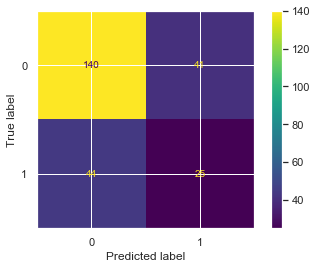

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt1, x_test, y_test)
plt.show()

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [79]:
# Check Feature Importance

dt1.feature_importances_

array([0.13935994, 0.22643101, 0.02581513, 0.02869829, 0.1294912 ,
       0.01709235, 0.00312789, 0.01960528, 0.00417052, 0.0083147 ,
       0.11522556, 0.01199026, 0.01603045, 0.00087533, 0.01920696,
       0.02670007, 0.01234085, 0.01965793, 0.00244527, 0.01059642,
       0.0061926 , 0.        , 0.03682962, 0.02196842, 0.02183389,
       0.00660333, 0.01112595, 0.0155979 , 0.        , 0.        ,
       0.01806358, 0.01145668, 0.        , 0.01315261])

In [57]:
dt2.feature_importances_

array([0.09806914, 0.21632513, 0.04026993, 0.08360988, 0.12945587,
       0.01724855, 0.00944798, 0.00537217, 0.0095018 , 0.00353898,
       0.10318757, 0.00785034, 0.00583731, 0.00561465, 0.01362759,
       0.02453419, 0.01334684, 0.01429647, 0.0109845 , 0.01185478,
       0.01345882, 0.00907524, 0.01624763, 0.02511349, 0.00961646,
       0.00552441, 0.01724255, 0.02565428, 0.01202648, 0.00412323,
       0.0256423 , 0.00412323, 0.        , 0.00817819])

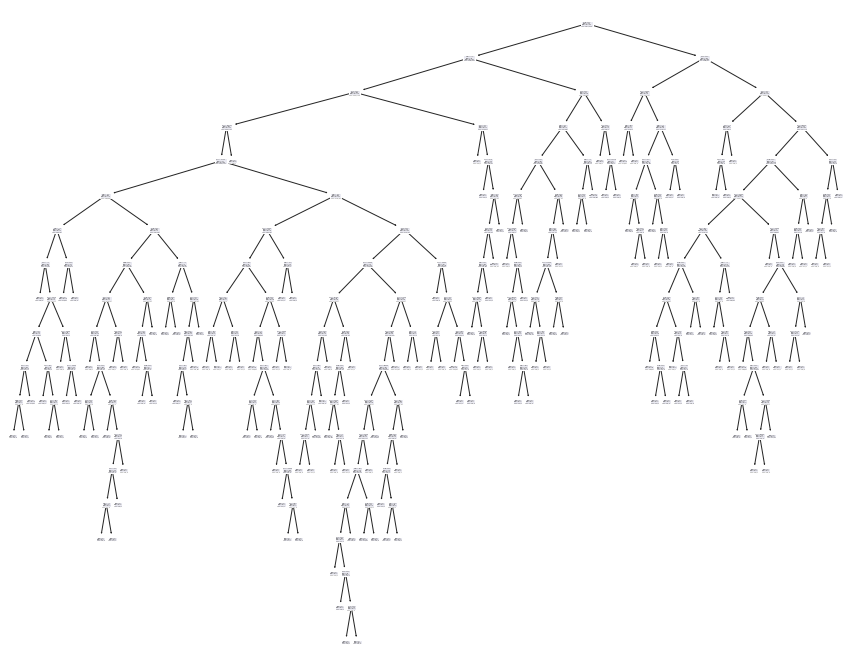

In [58]:
pd.DataFrame(index=x.columns, data=dt1.feature_importances_, columns=['Feature Importance'])

pd.DataFrame(index=x.columns, data=dt2.feature_importances_, columns=['Feature Importance'])

from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt1)
plt.show()


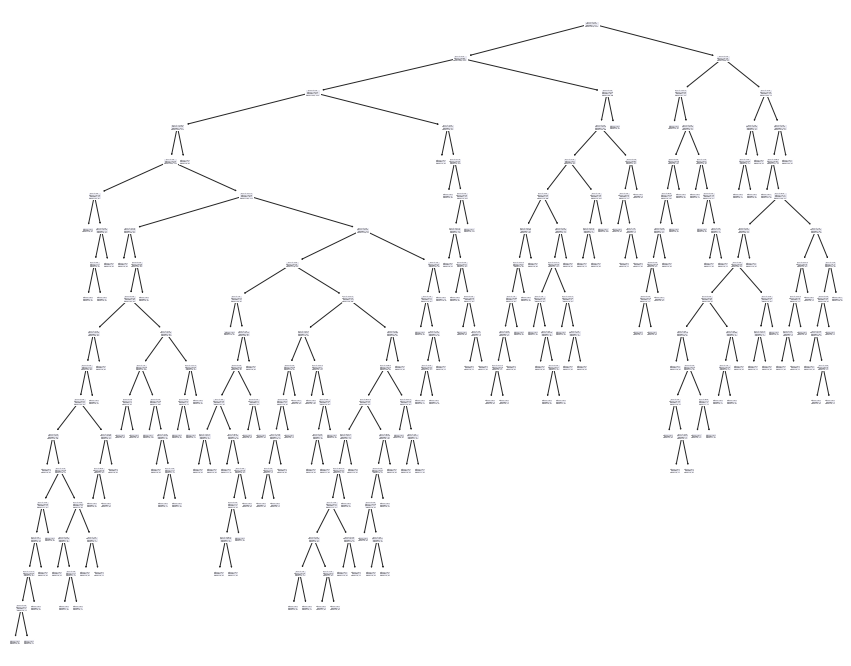

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt2)
plt.show()

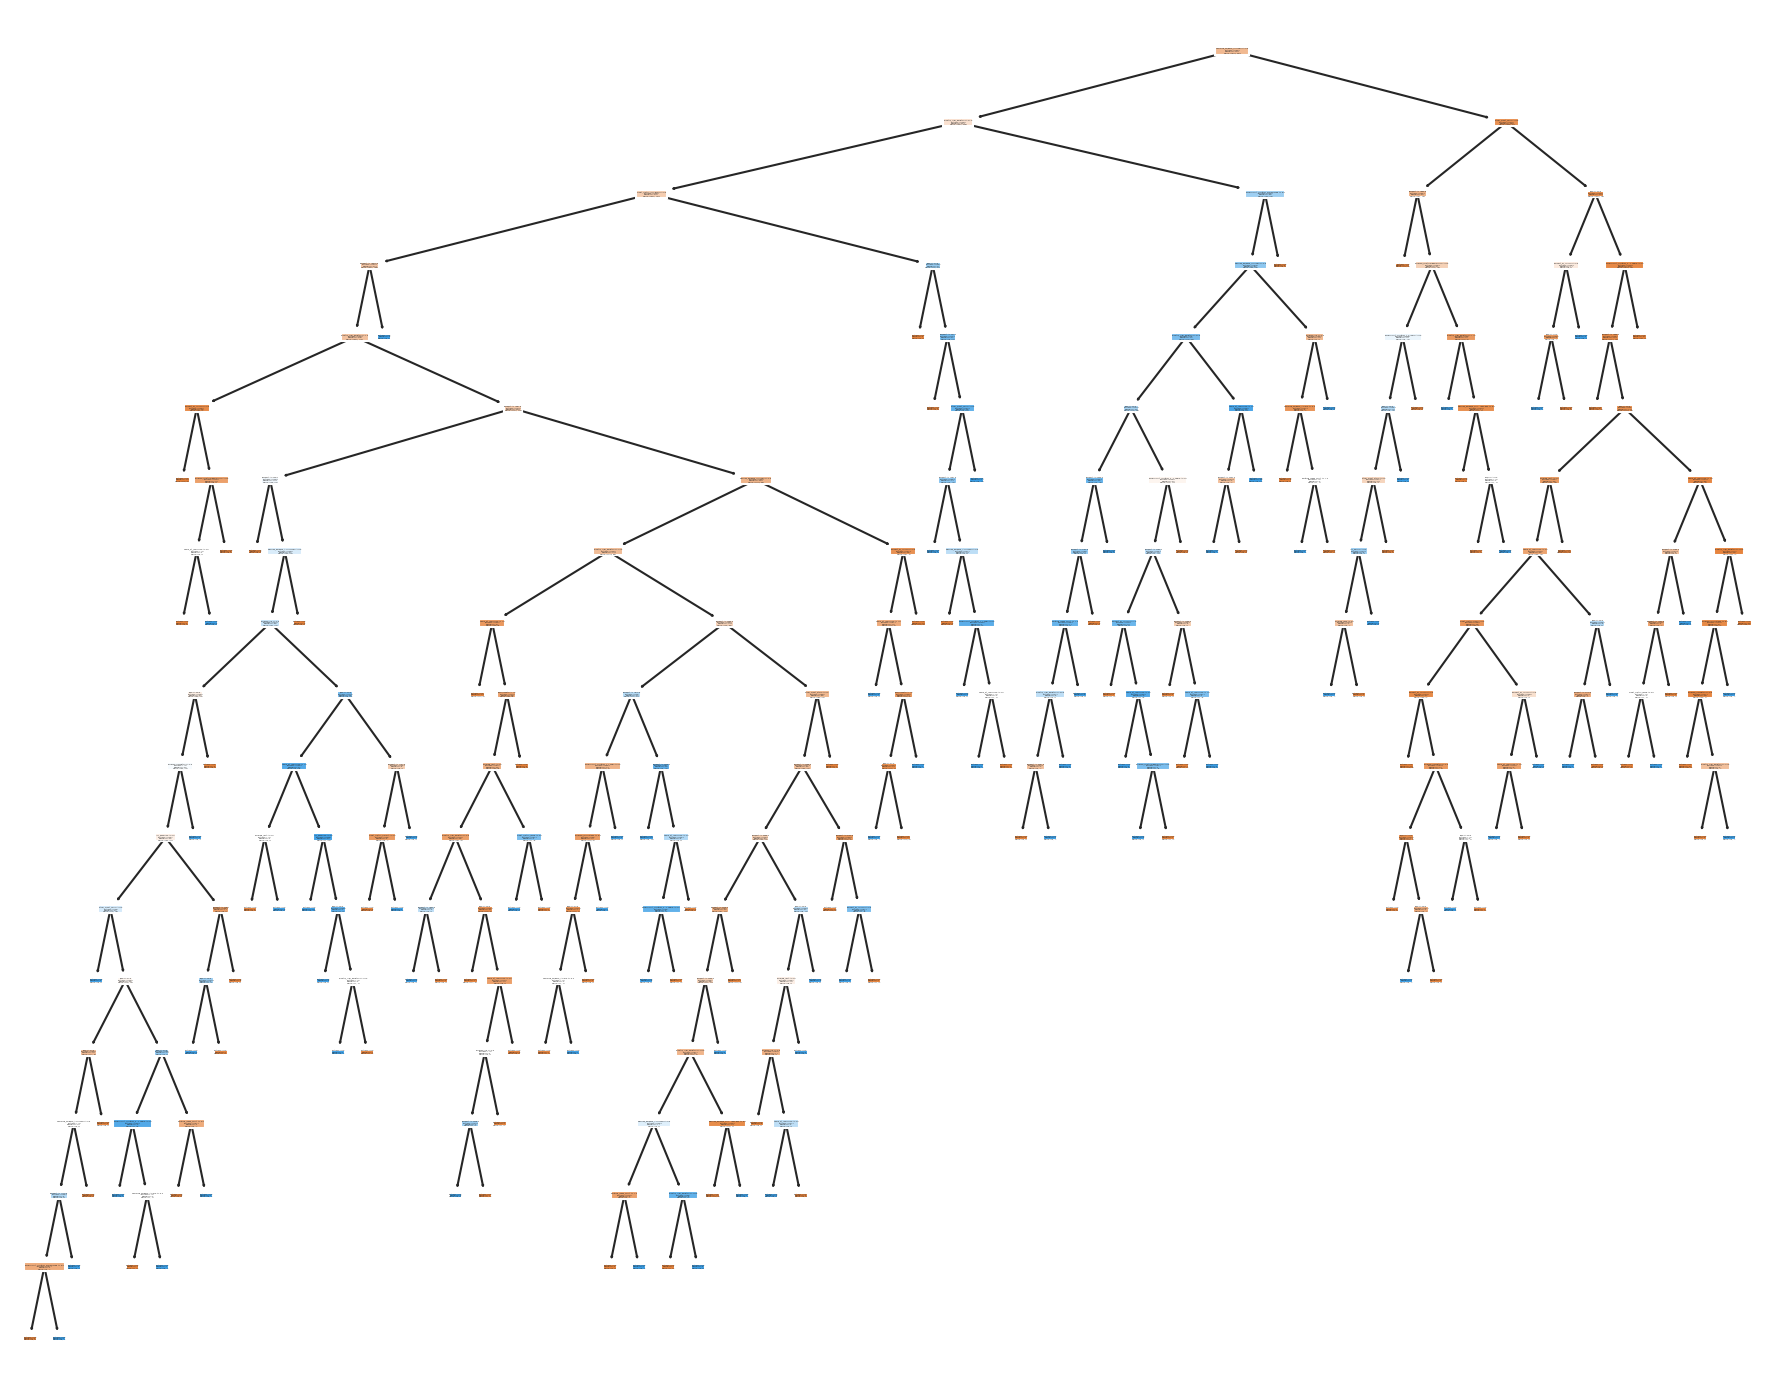

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12), dpi=150)
plot_tree(dt2, filled=True, feature_names = x.columns)
plt.show()


In [61]:

# Using Post-Prunning Method to handle overfitting problem
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(15,12), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)


              precision    recall  f1-score   support

           0       0.75      0.94      0.84       181
           1       0.55      0.17      0.26        69

    accuracy                           0.73       250
   macro avg       0.65      0.56      0.55       250
weighted avg       0.69      0.73      0.68       250





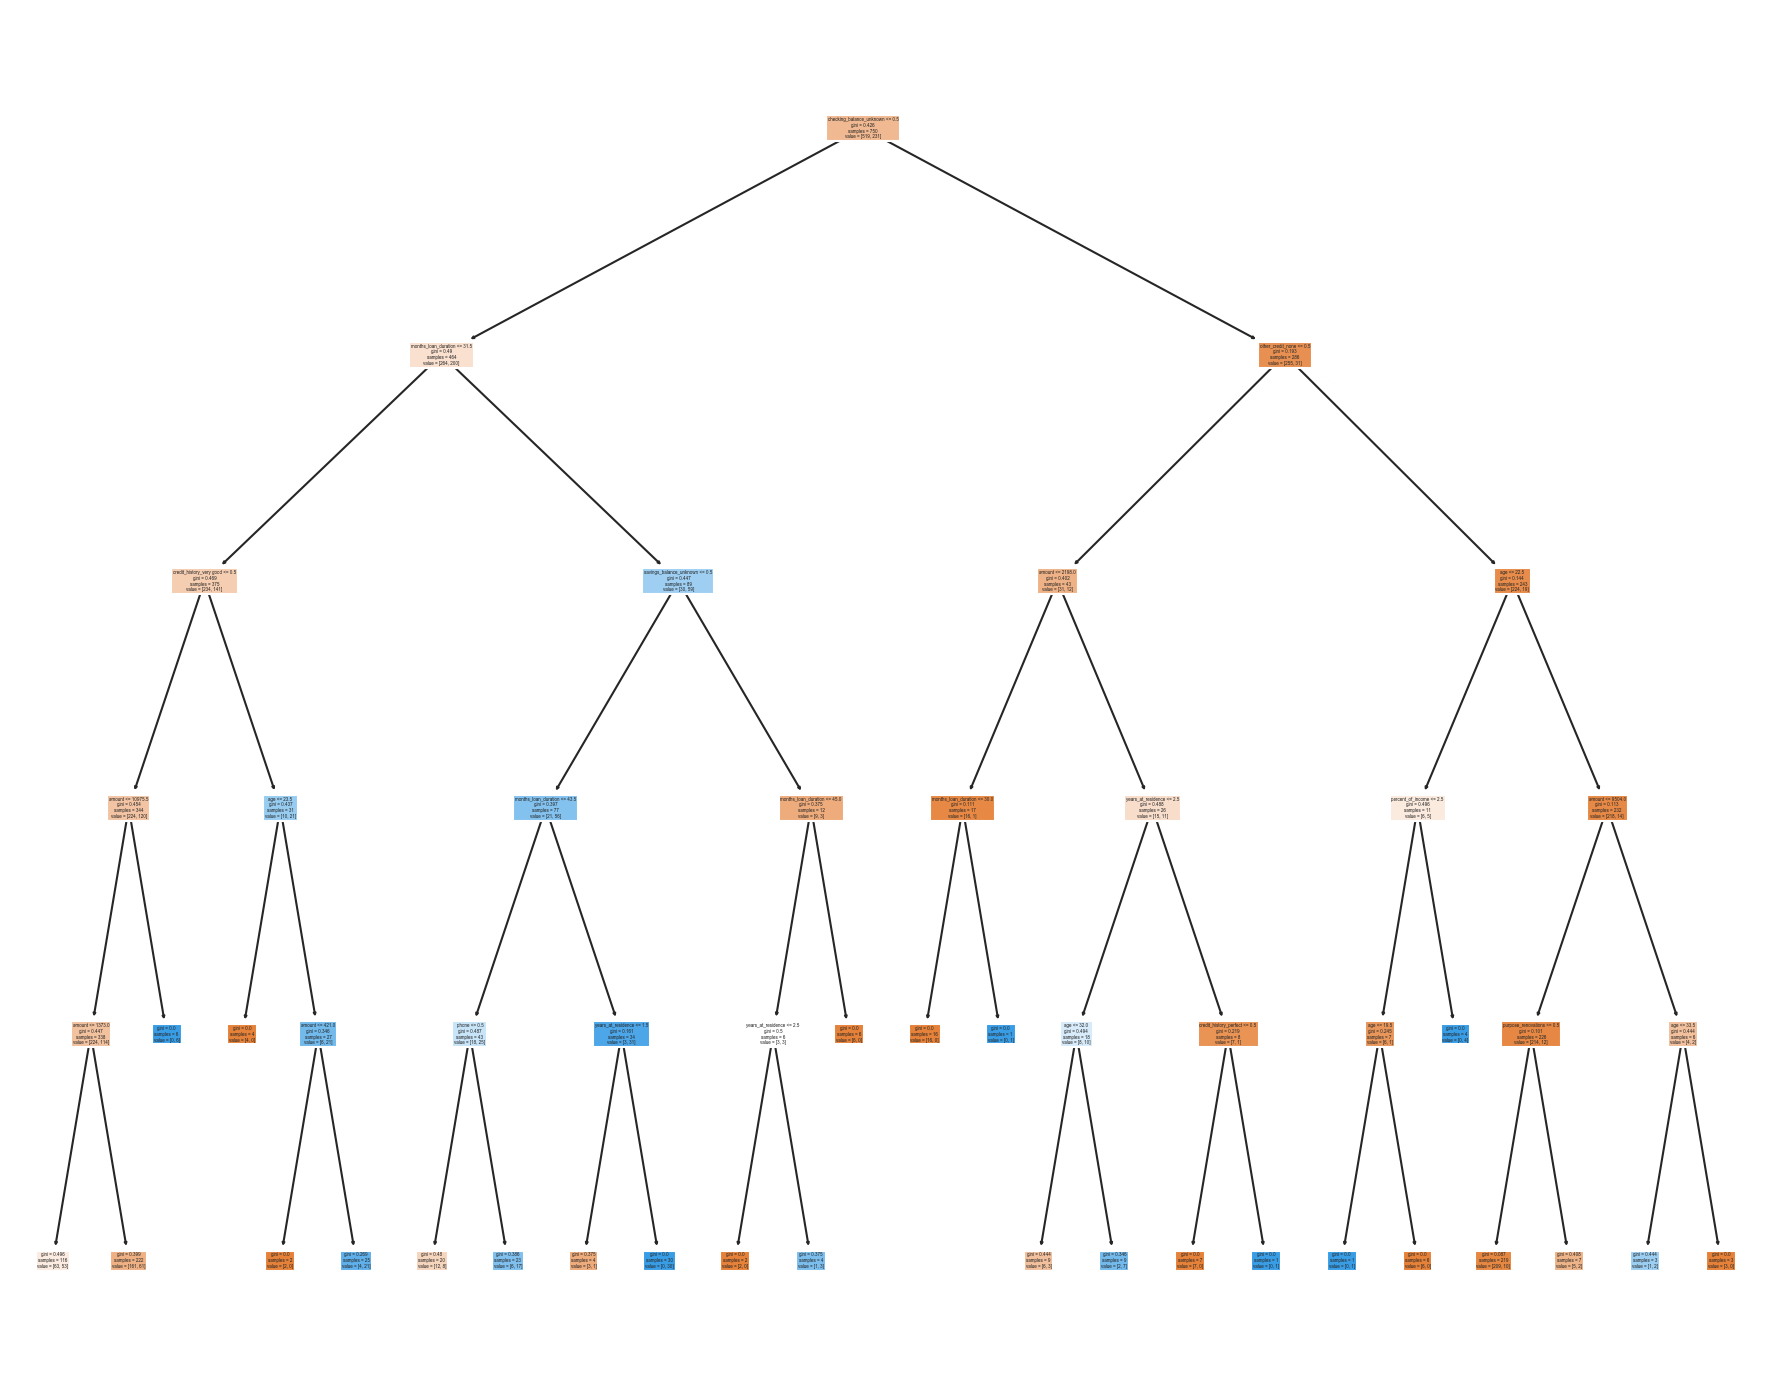

In [99]:

prunned_dtree = DecisionTreeClassifier(criterion='gini',max_depth=5)
#prunned_dtree = DecisionTreeClassifier(max_depth=2)
prunned_dtree.fit(x_train, y_train)

report_model(prunned_dtree)

y_pred_prunned_train = prunned_dtree.predict(x_train)
y_pred_prunned_test = prunned_dtree.predict(x_test)

# max depth we set after model building that is post prunning 
# and max depth is calculated using feature importance 
# the number of variable having significant feature importance value( farther from zero) are consider as max depth
# in this case only 5 variable have significant  feature importance value

In [100]:
print(accuracy_score(y_train, y_pred_prunned_train))
print()
print(accuracy_score(y_test, y_pred_prunned_test))



0.7973333333333333

0.732


In [101]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(prunned_dtree, x_train, y_train, cv=10)
test_accuracy = cross_val_score(prunned_dtree, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())


0.7413333333333334

0.732
